# <font color ='545aa7'> Chapter 6: Signal & Noise </font>

From **Scientific Computing for Chemists** by Charles Weiss. The document is copyright © 2021 Charles J. Weiss and is released under under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 6.1 Feature Detection
### 6.1.1 Global Maxima & Minima

In [2]:
nmr = np.genfromtxt('13C_ethanol.csv', delimiter=',', skip_footer=1, skip_header=1)

(70.0, 0.0)

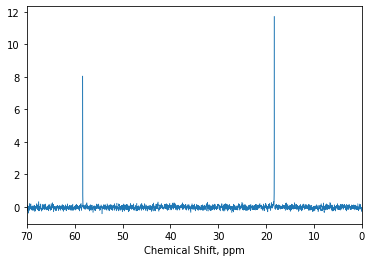

In [3]:
plt.plot(nmr[:,0], nmr[:,1], lw=0.5)
plt.xlabel('Chemical Shift, ppm')
plt.xlim(70, 0)

#plt.savefig('13C_NMR.png', dpi=300, format='PNG')

In [4]:
ir = np.genfromtxt('IR_acetone.csv', delimiter=',')

In [5]:
plt.plot(ir[:,0], ir[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.xlim(4000, 600)

#plt.savefig('ir_acetone.png', dpi=300, format='PNG')

(4000.0, 600.0)

In [6]:
np.max(nmr[:,1])

11.7279863357544

In [7]:
np.min(ir[:,1])

66.80017

In [8]:
imax = np.argmax(nmr[:,1])
imax

5395

In [9]:
imin = np.argmin(ir[:,1])
imin

2302

In [10]:
nmr[imax, 0]

18.312606267778

In [11]:
ir[imin, 0]

1710.068

(70.0, 0.0)

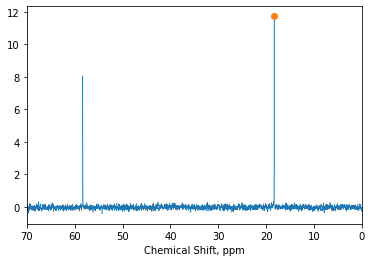

In [12]:
plt.plot(nmr[:,0], nmr[:,1], lw=0.5)
plt.plot(nmr[imax,0], nmr[imax,1], 'o')
plt.xlabel('Chemical Shift, ppm')
plt.xlim(70,0)

#plt.savefig('nmr_max.png', dpi=300, format='PNG')

Text(0, 0.5, 'Transmittance, %')

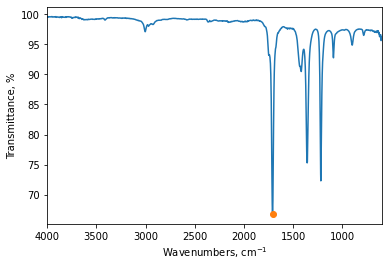

In [13]:
plt.plot(ir[:,0], ir[:,1])
plt.plot(ir[imin, 0], ir[imin, 1], 'o')
plt.xlim(4000, 600)
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')

#plt.savefig('ir_min.png', dpi=300, format='PNG')

## 6.1.2 Local Maximums & Minimums

In [14]:
from scipy.signal import argrelmax, argrelmin

In [15]:
imax = argrelmax(nmr[:,1], order=2000)
imax

(array([1219, 5395]),)

(70.0, 0.0)

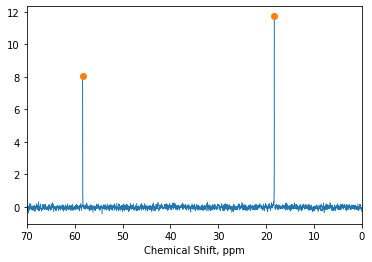

In [16]:
plt.plot(nmr[:,0], nmr[:,1], lw=0.5)
plt.plot(nmr[imax, 0], nmr[imax, 1], 'C1o')
plt.xlabel('Chemical Shift, ppm')
plt.xlim(70,0)

#plt.savefig('nmr_rel_max.png', dpi=300, format='PNG')

## 6.1.3 Slopes & Inflection Points

In [17]:
x = np.linspace(0, 2*np.pi, 1000)
y_smooth = np.sin(x)
y_noisy = np.sin(x) + 0.07 * np.random.rand(len(x))

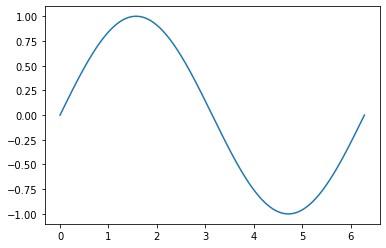

In [18]:
plt.plot(x, y_smooth)

#plt.savefig('sine_noisefree.png', dpi=300, format='PNG')

In [19]:
dy_smooth = np.diff(y_smooth, n=1)
dy_noisy = np.diff(y_noisy, n=1)
x2 = (x[:-1] + x[1:]) / 2 # x values one shorter

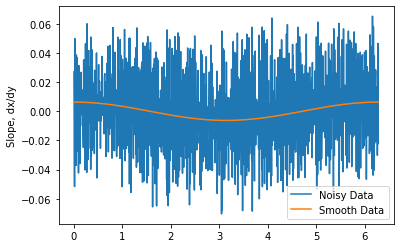

In [20]:
plt.plot(x2, dy_noisy, label='Noisy Data')
plt.plot(x2, dy_smooth, label='Smooth Data')
plt.ylabel('Slope, dx/dy')
plt.legend()

#plt.savefig('sine_smoothnoiseoverlay.png', dpi=300, format='PNG')

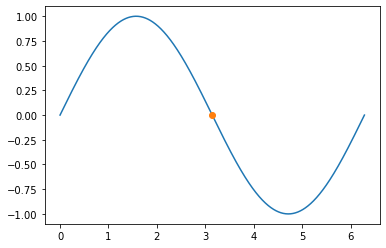

In [21]:
i = np.argmin(dy_smooth)  # finds min slope
plt.plot(x, y_smooth)
plt.plot(x[i], y_smooth[i], 'o')

#plt.savefig('sine_inflection.png', dpi=300, format='PNG')

### 6.2 Smoothing Data

In [22]:
t = np.linspace(0, 10 * np.pi, 1000)
signal = np.sin(t)
noise = np.random.rand(1000)
data = signal + 0.7 * (noise - 0.5)

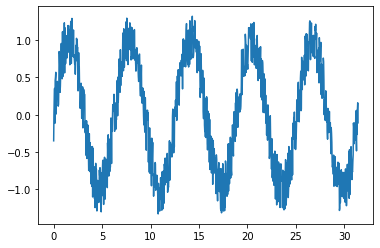

In [23]:
plt.plot(t, data)

#plt.savefig('sine_unsmoothed.png', dpi=300, format='PNG')

### 6.2.1 Unweighted Average

In [24]:
sum = data[:-2] + data[1:-1] + data[2:]
rect_smooth = sum / 3

plt.plot(t[1:-1], rect_smooth)

#plt.savefig('sine_rectSmooth.png', dpi=300, format='PNG')

### 6.2.2 Weighted Averages

In [25]:
sum = data[:-4] + 2*data[1:-3] + 3*data[2:-2] + 2*data[3:-1] + data[4:]
tri_smooth = sum / 9

plt.plot(t[2:-2], tri_smooth)

#plt.savefig('sine_triSmooth.png', dpi=300, format='PNG')

### 6.2.3 Median Smoothing

In [26]:
array2d = np.vstack((data[2:], data[1:-1], data[:-2]))
median_smooth = np.median(array2d, axis=0)

plt.plot(t[1:-1], median_smooth)

#plt.savefig('sine_medSmooth.png', dpi=300, format='PNG')

### 6.2.4 Savitzky–Golay

In [27]:
from scipy.signal import savgol_filter
sg_smooth = savgol_filter(data, 51, 3)

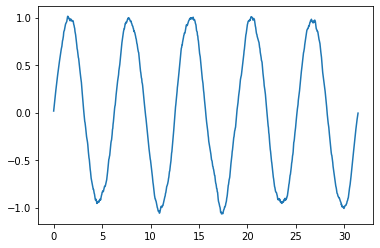

In [28]:
plt.plot(t, sg_smooth)

#plt.savefig('sine_sgSmooth.png', dpi=300, format='PNG')

## 6.3 Fourier Transforms

In [29]:
t = np.linspace(0,1,1000)
freq = 62.0  # Hz
signal = np.sin(freq*2*np.pi*t)
noise = np.random.rand(1000)
data = signal + 0.5 * noise

Text(0.5, 0, 'Time, s')

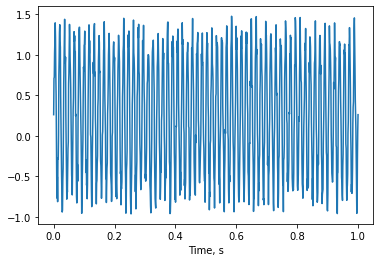

In [30]:
plt.plot(t, data)
plt.xlabel('Time, s')

#plt.savefig('sine_for_FT.png', dpi=300, format='PNG')

In [31]:
from scipy.fftpack import fft
fdata = fft(data)
plt.plot(fdata.real)
plt.xlim(0,500/2)
plt.xlabel('Frequency, Hz')

#plt.savefig('sine_freqDomain.png', dpi=300, format='PNG')

Text(0.5, 0, 'Frequency, Hz')

## 6.4 Fitting & Interpolation
### 6.4.1 Polynomial Fit

In [32]:
x = np.linspace(0,10,100)
noise = np.random.rand(100)
y_noisy = 2.2 * x + 3 * noise
y2_noisy = 3.4 * x**2 + 4 * x + 7 + 3 * noise
        
#plt.savefig('polyfit_scatter.png', dpi=300, format='PNG')

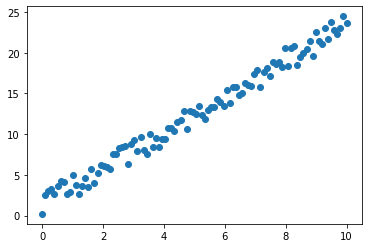

In [33]:
plt.scatter(x, y_noisy)
#plt.savefig('curve_scatter.png', dpi=300, format='PNG')

In [34]:
plt.scatter(x, y2_noisy)

In [35]:
np.polyfit(x, y_noisy, 1)

array([2.18775074, 1.53877683])

In [36]:
from scipy import stats
stats.linregress(x, y_noisy)

LinregressResult(slope=2.187750744288988, intercept=1.538776828079346, rvalue=0.9910935067706472, pvalue=1.259353506364102e-87, stderr=0.029694045568754792, intercept_stderr=0.17187103266587028)

In [37]:
np.polyfit(x, y2_noisy, 2)

array([3.4236851 , 3.75089974, 8.92954111])

### 6.4.3 Interpolation

In [38]:
x = np.linspace(1,20, 10)
y = np.sin(x)/x
plt.plot(x,y, 'o')
        
#plt.savefig('sine_wave_samples.png', dpi=300, format='PNG')

In [39]:
from scipy import interpolate
f = interpolate.interp1d(x, y, kind='linear')
f2 = interpolate.interp1d(x, y, kind='cubic')
#f3 = interpolate.interp1d(x, y, kind='nearest')

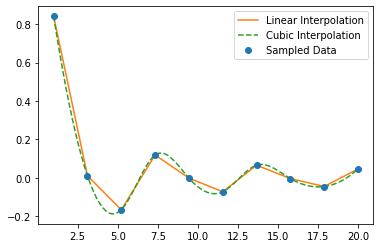

In [40]:
xnew = np.linspace(1,20,100)

plt.plot(xnew, f(xnew), 'C1-', label='Linear Interpolation')
plt.plot(xnew, f2(xnew), 'C2--', label='Cubic Interpolation')
#plt.plot(xnew, f3(xnew), 'C2-', label='Nearest Interpolation')
plt.plot(x,y, 'o', label='Sampled Data')
plt.legend()

#plt.savefig('interp1d.png', dpi=300, format='PNG')

## Exercises
### Feature Detection

1. Import the file **CV_K3Fe(CN)6.csv** which contains a cyclic voltammogram for potassium cyanoferrate. Plot the data with the green dots on the highest point(s) and red triangles on the lowest point(s).

2. Import the file titled **CV_K3Fe(CN)6.csv** and determine the inflection point. Plot the data with a marker on the inflection point.

### Signal & Noise

3. Generate noisy synthetic data from the following code.

~~~python        
from scipy.signal import sawtooth
import numpy as np
t = np.linspace(0, 4, 1000)
sig = sawtooth(2 * np.pi * t) + np.random.rand(1000)
~~~

a) Smooth the data using moving averages and plot the smoothed signal. Feel free to use the moving averages code from this chapter.

b) Smooth the same data using a Savitzky–Golay filter. Plot the smoothed signal.

4. Import the $^{31}$P NMR file titled **fid_31P.csv** and determine the number of major frequencies are in this wave. Keep in mind that there will be a second echo for each peak.

### Fitting & Interpolation

5. The wavelength of emitted light ($\lambda$) from hydrogen is related to the electron energy level transitions by the following equation where R$_\infty$ is the Rydberg constant, ni is the initial principle quantum number of the electron, and nf is the final principle quantum number of the electron.

$$ \frac{1}{\lambda} = R_\infty \left(\frac{1}{n_f^2} - \frac{1}{n_i^2} \right) $$

The following is experimental data of the wavelengths for five different transitions from the Balmer series (i.e., nf = 2).

| Transition ($n_i$ $\rightarrow$ $n_2$) | Wavelength (nm) |
| :--------:   |  :------: |
| 3 $\rightarrow$ 2 | 656.1 |
|4 $\rightarrow$ 2 | 485.2 |
| 5 $\rightarrow$ 2 | 433.2 |
| 6 $\rightarrow$ 2 | 409.1 |
| 7 $\rightarrow$ 2 | 396.4 |


Calculate a value for the Rydberg constant (R∞) using a linear fit of the above data. The data will need to be first linearized.

6. The following data is for the initial rate of a chemical reaction for different concentrations of starting material (A). Calculate a rate constant (k) for this reaction using a nonlinear fit.

| Conc A (M)  | Rate (M/s) |
| :----:       | :-----:    |
|  0.10 | 0.0034 |
|  0.16 | 0.0087 |
|  0.20 | 0.014  |
|  0.25 | 0.021  |
|  0.41 | 0.057  |
|  0.55 | 0.10   |


7. A colorimeter exhibits the following absorbances for known concentrations of Red 40 food dye. Generate a calibration curve using the data below and then calculate the concentration of Red 40 dye in a pink soft drink with an absorbance of 0.181.

| Absorb.  (@ 504 nm) | Red 40 (10$^{-5}$ M) | 
| :----:     |  :-----:   |
| 0.125 | 0.150 |
| 0.940 | 1.13 |
| 2.36 | 2.84 |
| 2.63 | 3.16 |
| 3.31 | 3.98 |
| 3.77 | 4.53 |


8. The following are points on the 2s radial wave function ($\Psi$) for a hydrogen atom with respect to the radial distance from the nucleus in Bohrs ($a_0$). Visualize the radial wave function as a smooth curve by interpolating the following data points.

| Radius ($a_0$) | $\Psi$  |
| :------:       | :----:  |
|1.0 | 0.21 |
|5.0 | -0.087 |
|9.0 | -0.027 |
|13.0 | -0.0058 |
|17.0 | -0.00108 |
